# Breast Cancer Detection

Breast cancer is a disease where abnormal breast cells grow uncontrollably, forming tumors. If untreated, these tumors can spread throughout the body and become fatal. The cancer cells typically start inside the milk ducts or lobules of the breast. The earliest stage, known as in situ, is not life-threatening and can be detected early. However, cancer can invade nearby breast tissue, forming tumors that cause lumps or thickening. Invasive cancers can spread to nearby lymph nodes or other organs, a process known as metastasis, which can be life-threatening. Treatment varies based on the individual, the type of cancer, and its spread, typically involving a combination of surgery, radiation therapy, and medications.

In 2022, there were 2.3 million new breast cancer diagnoses and 670,000 deaths globally. Breast cancer can occur at any age after puberty but is more common in later life. There are significant disparities in breast cancer incidence and mortality based on a country's Human Development Index (HDI). In high-HDI countries, 1 in 12 women will be diagnosed with breast cancer in their lifetime, and 1 in 71 will die from it. In contrast, in low-HDI countries, 1 in 27 women will be diagnosed, and 1 in 48 will die from it.

The primary risk factor for breast cancer is being female, with approximately 99% of cases occurring in women and 0.5-1% in men. Treatment for men follows the same principles as for women. The treatment approach depends on the cancer subtype and the extent of its spread, particularly to lymph nodes (stages II or III) or other body parts (stage IV).

Doctors use a combination of treatments to reduce the risk of recurrence. These treatments include:
- Surgery to remove the breast tumor
- Radiation therapy to reduce the risk of recurrence in the breast and surrounding tissues
- Medications, including hormonal therapies, chemotherapy, or targeted biological therapies

Early detection and completion of treatment improve the effectiveness and tolerability of breast cancer treatments. So, our project focuses on radiation therapy for breast cancer.

The most important variables for exploratory data analysis (EDA) depend on the specific goals and context of your analysis. In the context of breast cancer image analysis, particularly with the CBIS-DDSM dataset, some key variables to focus on include:

Pathology: Indicates whether the abnormality is benign, malignant, or benign without callback. This is crucial for understanding the distribution of disease types.

Mass Shape: Provides information on the shape of the mass, which can be important for identifying patterns associated with different pathologies.

Mass Margins: Describes the margins of the mass, which can also be related to the likelihood of malignancy.

Breast Density: Higher breast density can make it more difficult to detect abnormalities on mammograms.

Left or Right Breast: To see if there's any side-specific pattern.

Image View: Different views (e.g., CC, MLO) may have different implications for detection and diagnosis.

Subtlety: Indicates the radiologist's subjective assessment of the subtlety of the finding, which could correlate with diagnostic difficulty.

Assessment: The BI-RADS assessment category, which provides an estimate of the risk of malignancy.

Abnormality Type: To distinguish between different types of abnormalities (e.g., mass vs. calcification).

Key EDA Steps for Each Variable

Pathology

Distribution: Count plot to see the distribution of benign, malignant, and benign without callback cases.

Combination: Pathology vs. other variables to see patterns (e.g., pathology vs. mass shape, pathology vs. breast density).
Mass Shape

Distribution: Count plot to see the various shapes of masses.
Combination: Mass shape vs. pathology to identify any shape-specific patterns.

Mass Margins

Distribution: Count plot to observe the distribution of different margin types.

Combination: Mass margins vs. pathology for margin-specific patterns.

Breast Density

Distribution: Count plot to show the distribution of different density categories.

Combination: Breast density vs. pathology to see if density affects the likelihood of malignancy.

Left or Right Breast

Distribution: Count plot to see the distribution of abnormalities in left vs. right breast.

Combination: Breast side vs. pathology and breast side vs. breast density.
Image View

Distribution: Count plot to see the different image views used.

Combination: Image view vs. pathology to see if certain views are more associated with certain pathologies.

Subtlety

Distribution: Count plot to see the distribution of subtlety scores.

Combination: Subtlety vs. pathology to see if subtlety affects the likelihood of malignancy.

Assessment

Distribution: Count plot for BI-RADS categories.

Combination: Assessment vs. pathology to correlate assessment scores with malignancy rates.

Abnormality Type

Distribution: Count plot for different abnormality types.
Combination: Abnormality type vs. pathology for type-specific patterns.

## Importing Necessary Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DICOM CSV File

In [2]:
df_dicom = pd.read_csv(r'csv/dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [3]:
df_dicom.shape

(10237, 38)

In [4]:
df_dicom.isnull().sum()

file_path                                          0
image_path                                         0
AccessionNumber                                10237
BitsAllocated                                      0
BitsStored                                         0
BodyPartExamined                                   0
Columns                                            0
ContentDate                                        0
ContentTime                                        0
ConversionType                                     0
HighBit                                            0
InstanceNumber                                     0
LargestImagePixelValue                             0
Laterality                                       566
Modality                                           0
PatientBirthDate                               10237
PatientID                                          0
PatientName                                        0
PatientOrientation                            

As 'ReferringPhysicianName', 'PatientSex', 'PatientBirthDate', 'AccessionNumber' as all empty, we can remove them from the dataset.

We will also remove 'file_path' as it refers to the file path of DICOM images and we don't have that with us.

In [5]:
df_dicom = df_dicom.drop(['file_path', 'AccessionNumber', 'PatientBirthDate', 'PatientSex', 'ReferringPhysicianName'], axis = 1)

In [6]:
df_dicom.head()

,image_path,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,HighBit,InstanceNumber,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,351,20160426,131732.685,WSD,15,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,3526,20160426,143829.101,WSD,15,1,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,1546,20160503,111956.298,WSD,15,1,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,97,20160503,115347.770,WSD,15,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,3104,20160503,115347.770,WSD,7,1,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [7]:
df_dicom.dtypes

image_path                                      object
BitsAllocated                                    int64
BitsStored                                       int64
BodyPartExamined                                object
Columns                                          int64
ContentDate                                      int64
ContentTime                                    float64
ConversionType                                  object
HighBit                                          int64
InstanceNumber                                   int64
LargestImagePixelValue                           int64
Laterality                                      object
Modality                                        object
PatientID                                       object
PatientName                                     object
PatientOrientation                              object
PhotometricInterpretation                       object
PixelRepresentation                              int64
Rows      

In [8]:
df_dicom.describe()

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,HighBit,InstanceNumber,LargestImagePixelValue,PixelRepresentation,Rows,SamplesPerPixel,SeriesNumber,SmallestImagePixelValue,StudyDate,StudyTime
count,10237.000000,10237.000000,10237.000000,1.023700e+04,10237.000000,10237.000000,10237.0,10237.000000,10237.0,10237.000000,10237.0,10237.0,10237.000000,9.671000e+03,9671.000000
mean,13.212465,13.212465,2179.893328,2.016047e+07,123061.253633,12.212465,1.0,42612.290222,0.0,3549.778841,1.0,1.0,9294.026473,2.016440e+07,157864.407817
std,3.812001,3.812001,1374.221082,1.110497e+02,11391.443116,3.812001,0.0,30995.808636,0.0,2363.196643,0.0,0.0,15367.554560,4.831298e+03,51545.806583
min,8.000000,8.000000,68.000000,2.016041e+07,82755.508003,7.000000,1.0,255.000000,0.0,73.000000,1.0,1.0,0.000000,2.016072e+07,82235.000000
25%,8.000000,8.000000,453.000000,2.016043e+07,113739.594000,7.000000,1.0,255.000000,0.0,441.000000,1.0,1.0,0.000000,2.016072e+07,90742.500000
50%,16.000000,16.000000,2728.000000,2.016050e+07,122935.931000,15.000000,1.0,65535.000000,0.0,4624.000000,1.0,1.0,0.000000,2.016081e+07,170335.000000
75%,16.000000,16.000000,3112.000000,2.016050e+07,132211.431000,15.000000,1.0,65535.000000,0.0,5476.000000,1.0,1.0,19687.000000,2.017083e+07,214819.000000
max,16.000000,16.000000,5431.000000,2.017092e+07,160507.857000,15.000000,1.0,65535.000000,0.0,7111.000000,1.0,1.0,59538.000000,2.017093e+07,224502.000000


In [9]:
df_dicom.isnull().sum()

image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
Columns                                          0
ContentDate                                      0
ContentTime                                      0
ConversionType                                   0
HighBit                                          0
InstanceNumber                                   0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
Rows                                             0
SOPClassUID                    

We will be filling the null values of 'Laterality' and 'SeriesDescription' with the most common values occuring in these columns.

In [10]:
selected_columns = ['Laterality', 'SeriesDescription']

for column in selected_columns:
    mode_value = df_dicom[column].mode()[0]
    df_dicom[column].fillna(mode_value, inplace=True)

df_dicom.head()

,image_path,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,HighBit,InstanceNumber,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,351,20160426,131732.685,WSD,15,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,3526,20160426,143829.101,WSD,15,1,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,1546,20160503,111956.298,WSD,15,1,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,97,20160503,115347.770,WSD,15,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,3104,20160503,115347.770,WSD,7,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


We will be filling null values for 'StudyDate' and 'StudyTime' using ffill method.

In [11]:
df_dicom[['StudyDate', 'StudyTime']] = df_dicom[['StudyDate', 'StudyTime']].fillna(method='ffill')

df_dicom.isnull().sum()

image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
Columns                                        0
ContentDate                                    0
ContentTime                                    0
ConversionType                                 0
HighBit                                        0
InstanceNumber                                 0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
Rows                                           0
SOPClassUID                                    0
SOPInstanceUID      

In [12]:
df_dicom.head()

,image_path,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,HighBit,InstanceNumber,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,351,20160426,131732.685,WSD,15,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,3526,20160426,143829.101,WSD,15,1,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,1546,20160503,111956.298,WSD,15,1,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,97,20160503,115347.770,WSD,15,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,3104,20160503,115347.770,WSD,7,1,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0


### Preparing for Visualization for 'dicom_info' file

In [13]:
unique_counts = {}

for column in df_dicom.columns:
    unique_counts[column] = df_dicom[column].nunique()
    
for column, count in unique_counts.items():
    print(f'Unique counts of {column} Column: {count}')

Unique counts of image_path Column: 10237
Unique counts of BitsAllocated Column: 2
Unique counts of BitsStored Column: 2
Unique counts of BodyPartExamined Column: 3
Unique counts of Columns Column: 1208
Unique counts of ContentDate Column: 5
Unique counts of ContentTime Column: 6774
Unique counts of ConversionType Column: 1
Unique counts of HighBit Column: 2
Unique counts of InstanceNumber Column: 1
Unique counts of LargestImagePixelValue Column: 235
Unique counts of Laterality Column: 2
Unique counts of Modality Column: 1
Unique counts of PatientID Column: 6990
Unique counts of PatientName Column: 6575
Unique counts of PatientOrientation Column: 2
Unique counts of PhotometricInterpretation Column: 1
Unique counts of PixelRepresentation Column: 1
Unique counts of Rows Column: 1077
Unique counts of SOPClassUID Column: 1
Unique counts of SOPInstanceUID Column: 10237
Unique counts of SamplesPerPixel Column: 1
Unique counts of SecondaryCaptureDeviceManufacturer Column: 2
Unique counts of S

In [14]:
# Initialize an empty list to store columns to drop
columns_to_drop = []

# Loop through each column and check unique occurrences
for column in df_dicom.columns:
    if df_dicom[column].nunique() == 1:
        columns_to_drop.append(column)

# Drop columns with a unique count of 1
df_dicom.drop(columns=columns_to_drop, inplace=True)

pd.set_option('display.max_columns', None)

df_dicom.head()

,image_path,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,HighBit,LargestImagePixelValue,Laterality,PatientID,PatientName,PatientOrientation,Rows,SOPInstanceUID,SecondaryCaptureDeviceManufacturer,SeriesDescription,SeriesInstanceUID,SmallestImagePixelValue,StudyDate,StudyInstanceUID,StudyTime
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,351,20160426,131732.685,15,65535,R,Mass-Training_P_01265_RIGHT_MLO_1,Mass-Training_P_01265_RIGHT_MLO_1,MLO,289,1.3.6.1.4.1.9590.100.1.2.426380754911844882201...,MathWorks,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,23078,20160720.0,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,3526,20160426,143829.101,15,65535,R,Mass-Training_P_01754_RIGHT_CC,Mass-Training_P_01754_RIGHT_CC,CC,6256,1.3.6.1.4.1.9590.100.1.2.235715018911442345533...,MathWorks,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,0,20160720.0,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,1546,20160503,111956.298,15,65535,R,Calc-Training_P_00232_RIGHT_CC,Calc-Training_P_00232_RIGHT_CC,CC,4126,1.3.6.1.4.1.9590.100.1.2.212917405611495375422...,MathWorks,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,0,20160807.0,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,97,20160503,115347.770,15,65535,L,Calc-Test_P_00562_LEFT_CC_2,Calc-Test_P_00562_LEFT_CC_2,CC,97,1.3.6.1.4.1.9590.100.1.2.405776661412249467913...,MathWorks,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,32298,20170829.0,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,3104,20160503,115347.770,7,255,L,P_00562_LEFT_CC_2.dcm,P_00562^P_00562,CC,4560,1.3.6.1.4.1.9590.100.1.2.418434643810489919922...,MathWorks,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,0,20170829.0,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0


In [15]:
df_dicom['ContentDate'] =df_dicom['ContentDate'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d').strftime('%Y-%m-%d'))
df_dicom['StudyDate'] = df_dicom['StudyDate'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d').strftime('%Y-%m-%d'))

df_dicom.head()

,image_path,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,HighBit,LargestImagePixelValue,Laterality,PatientID,PatientName,PatientOrientation,Rows,SOPInstanceUID,SecondaryCaptureDeviceManufacturer,SeriesDescription,SeriesInstanceUID,SmallestImagePixelValue,StudyDate,StudyInstanceUID,StudyTime
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,351,2016-04-26,131732.685,15,65535,R,Mass-Training_P_01265_RIGHT_MLO_1,Mass-Training_P_01265_RIGHT_MLO_1,MLO,289,1.3.6.1.4.1.9590.100.1.2.426380754911844882201...,MathWorks,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,23078,2016-07-20,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,3526,2016-04-26,143829.101,15,65535,R,Mass-Training_P_01754_RIGHT_CC,Mass-Training_P_01754_RIGHT_CC,CC,6256,1.3.6.1.4.1.9590.100.1.2.235715018911442345533...,MathWorks,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,0,2016-07-20,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,1546,2016-05-03,111956.298,15,65535,R,Calc-Training_P_00232_RIGHT_CC,Calc-Training_P_00232_RIGHT_CC,CC,4126,1.3.6.1.4.1.9590.100.1.2.212917405611495375422...,MathWorks,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,0,2016-08-07,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,97,2016-05-03,115347.770,15,65535,L,Calc-Test_P_00562_LEFT_CC_2,Calc-Test_P_00562_LEFT_CC_2,CC,97,1.3.6.1.4.1.9590.100.1.2.405776661412249467913...,MathWorks,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,32298,2017-08-29,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,3104,2016-05-03,115347.770,7,255,L,P_00562_LEFT_CC_2.dcm,P_00562^P_00562,CC,4560,1.3.6.1.4.1.9590.100.1.2.418434643810489919922...,MathWorks,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,0,2017-08-29,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0


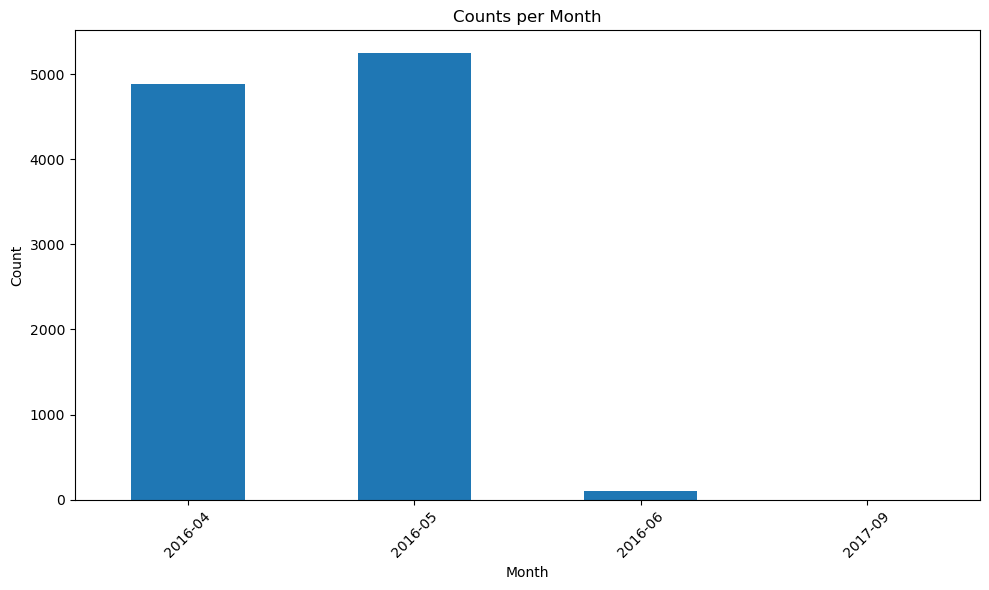

In [16]:
# Convert 'ContentDate' to datetime
df_dicom['ContentDate'] = pd.to_datetime(df_dicom['ContentDate'])

# Extract year and month
df_dicom['YYYY-MM'] = df_dicom['ContentDate'].dt.to_period('M')

# Count occurrences per year-month
date_counts = df_dicom['YYYY-MM'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

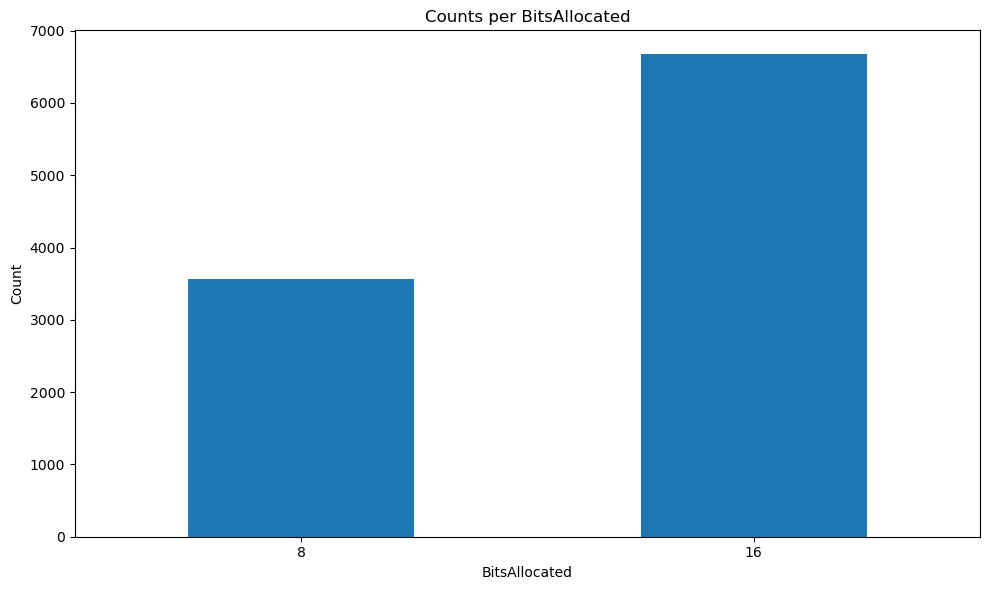

In [17]:
# Count occurrences per year-month
date_counts = df_dicom['BitsAllocated'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.xlabel('BitsAllocated')
plt.ylabel('Count')
plt.title('Counts per BitsAllocated')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

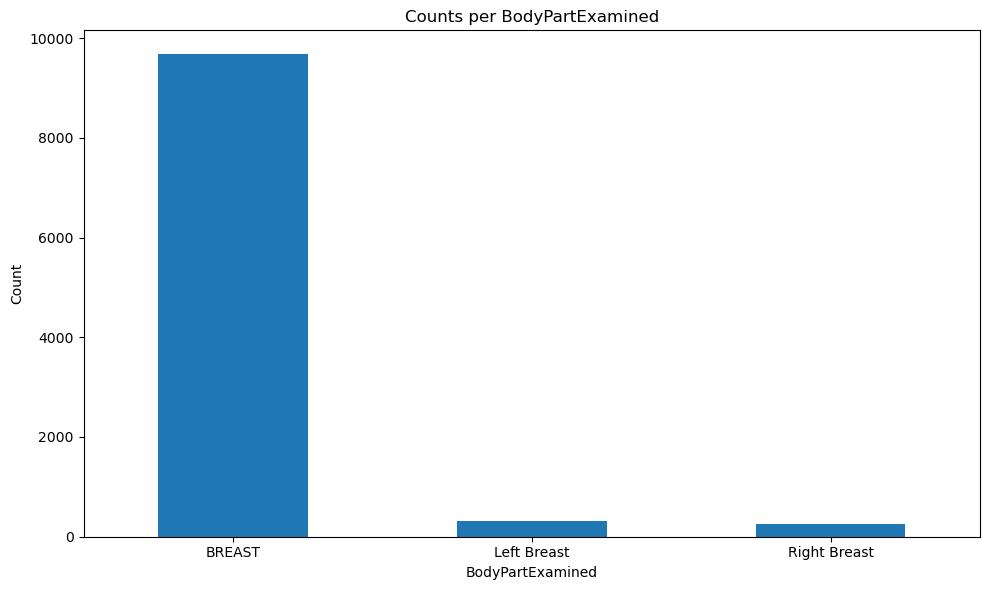

In [18]:
# Count occurrences per year-month
date_counts = df_dicom['BodyPartExamined'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.xlabel('BodyPartExamined')
plt.ylabel('Count')
plt.title('Counts per BodyPartExamined')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

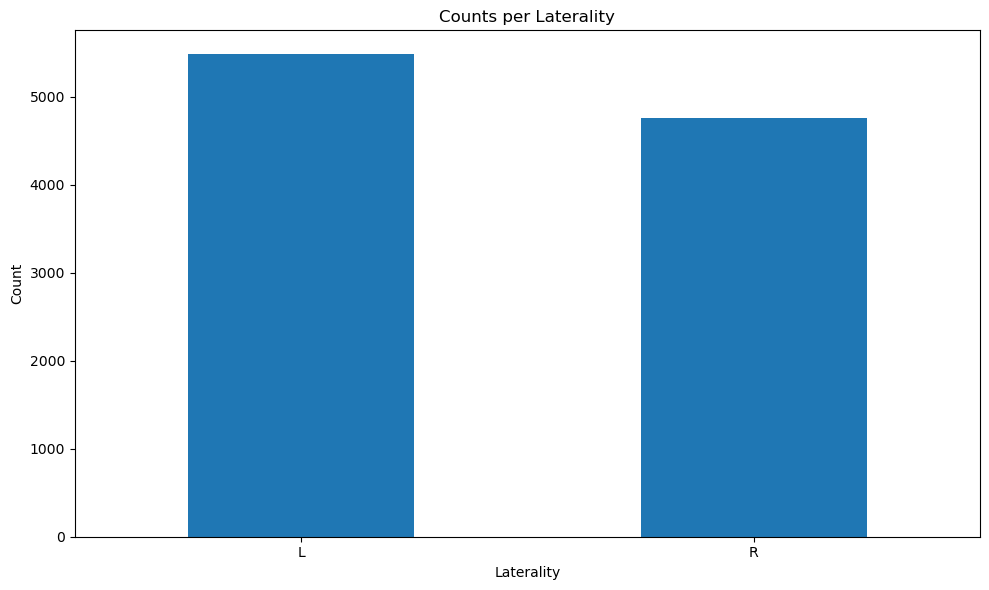

In [19]:
# Count occurrences per year-month
date_counts = df_dicom['Laterality'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.xlabel('Laterality')
plt.ylabel('Count')
plt.title('Counts per Laterality')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

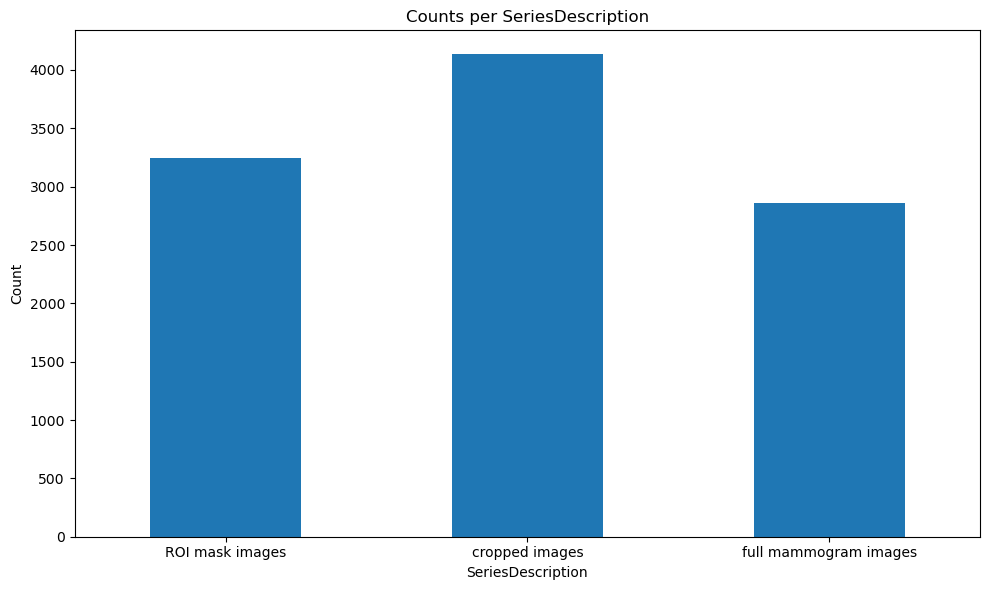

In [20]:
# Count occurrences per year-month
date_counts = df_dicom['SeriesDescription'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.xlabel('SeriesDescription')
plt.ylabel('Count')
plt.title('Counts per SeriesDescription')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

## Scanned Mammogram Images

### Cropped Images

In [21]:
cropped_images = df_dicom[df_dicom.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
4    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
Name: image_path, dtype: object

In [22]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/', ''))
cropped_images.head()

0    jpeg/1.3.6.1.4.1.9590.100.1.2.1293087268128519...
3    jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...
4    jpeg/1.3.6.1.4.1.9590.100.1.2.3811873696115245...
6    jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...
7    jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...
Name: image_path, dtype: object

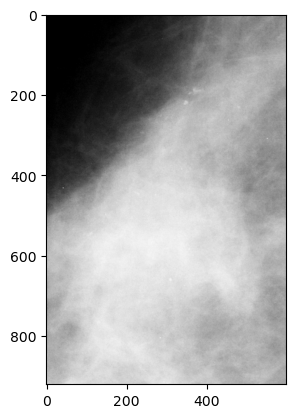

In [23]:
import PIL

for file in cropped_images[0:10]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

### Full Mammogram Images

In [24]:
full_mammogram_images = df_dicom[df_dicom.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [25]:
#full_mammgram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', 'jpeg'))

full_mammogram_images = full_mammogram_images.str.replace('CBIS-DDSM/', '')
full_mammogram_images.head()

1     jpeg/1.3.6.1.4.1.9590.100.1.2.2483867420106785...
2     jpeg/1.3.6.1.4.1.9590.100.1.2.2672131710111718...
11    jpeg/1.3.6.1.4.1.9590.100.1.2.2103968939112343...
12    jpeg/1.3.6.1.4.1.9590.100.1.2.7495665831138395...
15    jpeg/1.3.6.1.4.1.9590.100.1.2.9876588541294641...
Name: image_path, dtype: object

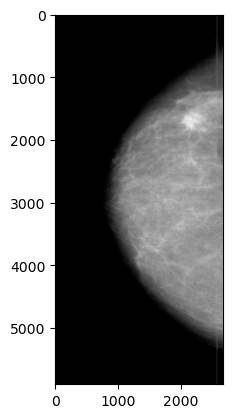

In [26]:
for file  in full_mammogram_images[0:10]:
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

### ROI Mask Images

In [27]:
ROI_mask_images = df_dicom[df_dicom.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [28]:
ROI_mask_images = ROI_mask_images.str.replace('CBIS-DDSM/', '')
ROI_mask_images.head()

5     jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...
8     jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...
9     jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...
14    jpeg/1.3.6.1.4.1.9590.100.1.2.2363735487129941...
20    jpeg/1.3.6.1.4.1.9590.100.1.2.3570080504125347...
Name: image_path, dtype: object

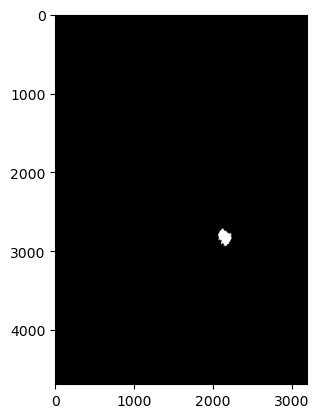

In [29]:
for file  in ROI_mask_images[0:10]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

## Mass_Case_Description

In [34]:
df_mass_test = pd.read_csv(r'csv/mass_case_description_test_set.csv')
df_mass_test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [35]:
df_mass_train = pd.read_csv(r'csv/mass_case_description_train_set.csv')
df_mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [36]:
df_mass = pd.concat([df_mass_train, df_mass_test])
df_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [37]:
print('df_mass:', df_mass.shape)

df_mass: (1696, 14)


In [38]:
# check for missing values
print(df_mass.info())
print(df_mass.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1696 non-null   object
 1   breast_density           1696 non-null   int64 
 2   left or right breast     1696 non-null   object
 3   image view               1696 non-null   object
 4   abnormality id           1696 non-null   int64 
 5   abnormality type         1696 non-null   object
 6   mass shape               1692 non-null   object
 7   mass margins             1636 non-null   object
 8   assessment               1696 non-null   int64 
 9   pathology                1696 non-null   object
 10  subtlety                 1696 non-null   int64 
 11  image file path          1696 non-null   object
 12  cropped image file path  1696 non-null   object
 13  ROI mask file path       1696 non-null   object
dtypes: int64(4), object(10)
memory usage: 198

In [39]:
# categorical variables
print(df_mass['breast_density'].value_counts())
print(df_mass['pathology'].value_counts())
print(df_mass['mass shape'].value_counts())

2    757
3    449
1    337
4    153
Name: breast_density, dtype: int64
MALIGNANT                  784
BENIGN                     771
BENIGN_WITHOUT_CALLBACK    141
Name: pathology, dtype: int64
IRREGULAR                                   464
OVAL                                        412
LOBULATED                                   384
ROUND                                       164
ARCHITECTURAL_DISTORTION                    103
IRREGULAR-ARCHITECTURAL_DISTORTION           52
LYMPH_NODE                                   35
ASYMMETRIC_BREAST_TISSUE                     25
FOCAL_ASYMMETRIC_DENSITY                     25
LOBULATED-IRREGULAR                           6
OVAL-LYMPH_NODE                               6
LOBULATED-LYMPH_NODE                          4
ROUND-OVAL                                    3
LOBULATED-ARCHITECTURAL_DISTORTION            2
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY            2
LOBULATED-OVAL                                1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTI

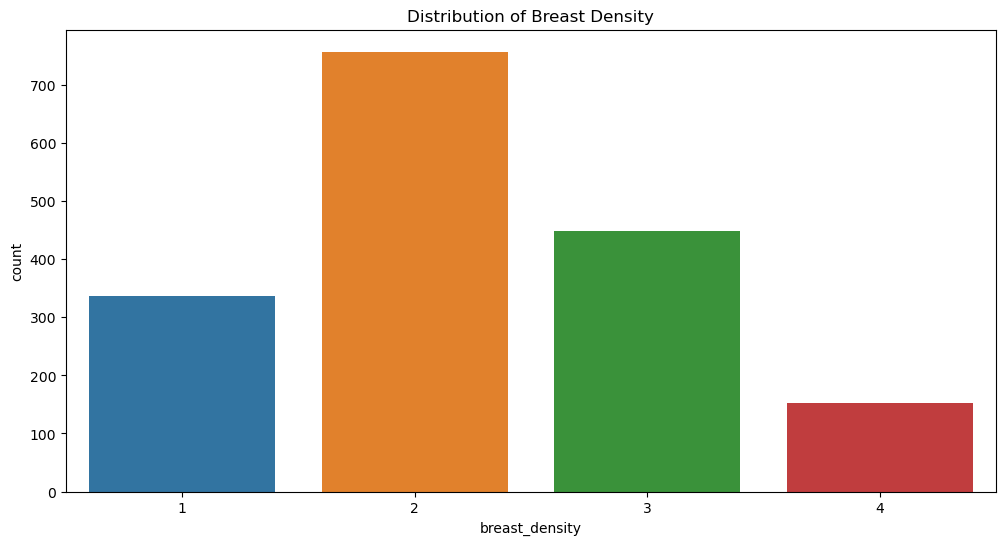

In [41]:
import seaborn as sns

#breast density distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass, x='breast_density')
plt.title('Distribution of Breast Density')
plt.show()

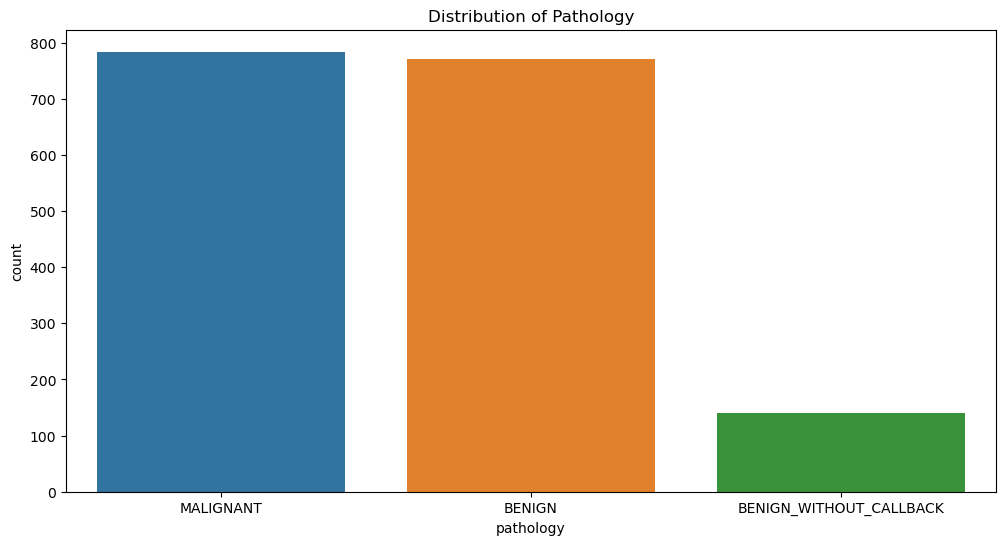

In [42]:
#pathology distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass, x='pathology')
plt.title('Distribution of Pathology')
plt.show()

In [43]:
duplicate_rows = df_mass[df_mass.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [44]:
df_mass_cleaned = df_mass.drop_duplicates()
print(f"Data shape after removing duplicates: {df_mass_cleaned.shape}")

Data shape after removing duplicates: (1696, 14)


In [45]:
# missing values
df_mass['mass shape'].fillna('UNKNOWN', inplace=True)
df_mass['mass margins'].fillna('UNKNOWN', inplace=True)

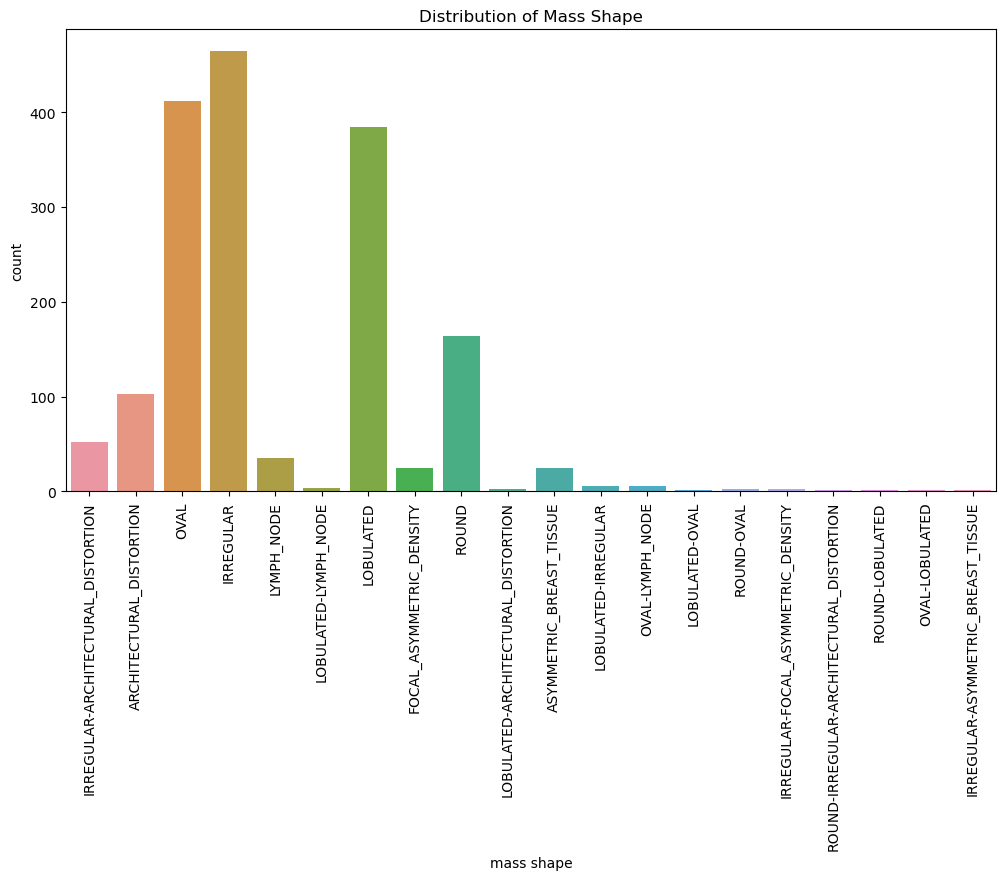

In [46]:
# distribution of mass shape
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass_cleaned, x='mass shape')
plt.title('Distribution of Mass Shape')
plt.xticks(rotation=90)
plt.show()

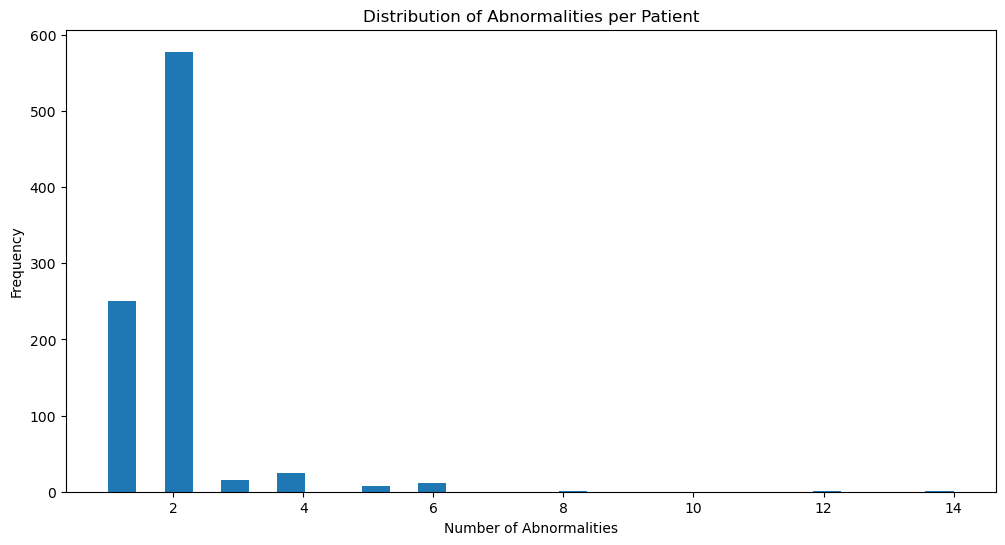

In [47]:
#Abnormal distribution
plt.figure(figsize=(12, 6))
df_mass['patient_id'].value_counts().plot(kind='hist', bins=30)
plt.title('Distribution of Abnormalities per Patient')
plt.xlabel('Number of Abnormalities')
plt.show()

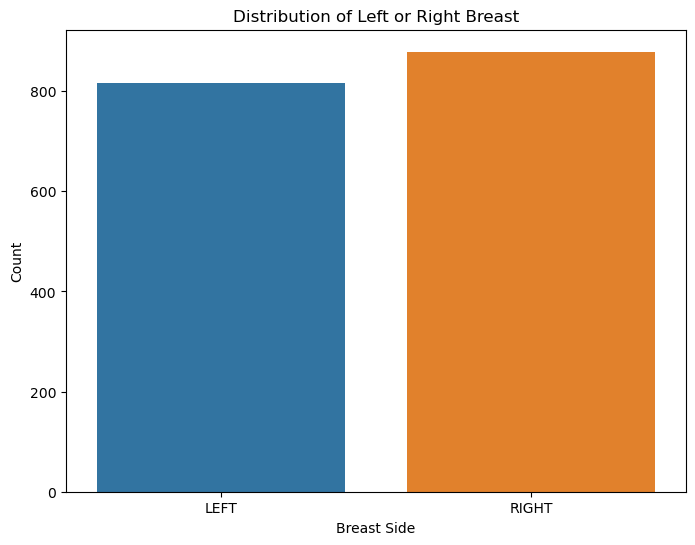

In [48]:
# left or right breast distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_mass_cleaned, x='left or right breast')
plt.title('Distribution of Left or Right Breast')
plt.xlabel('Breast Side')
plt.ylabel('Count')
plt.show()

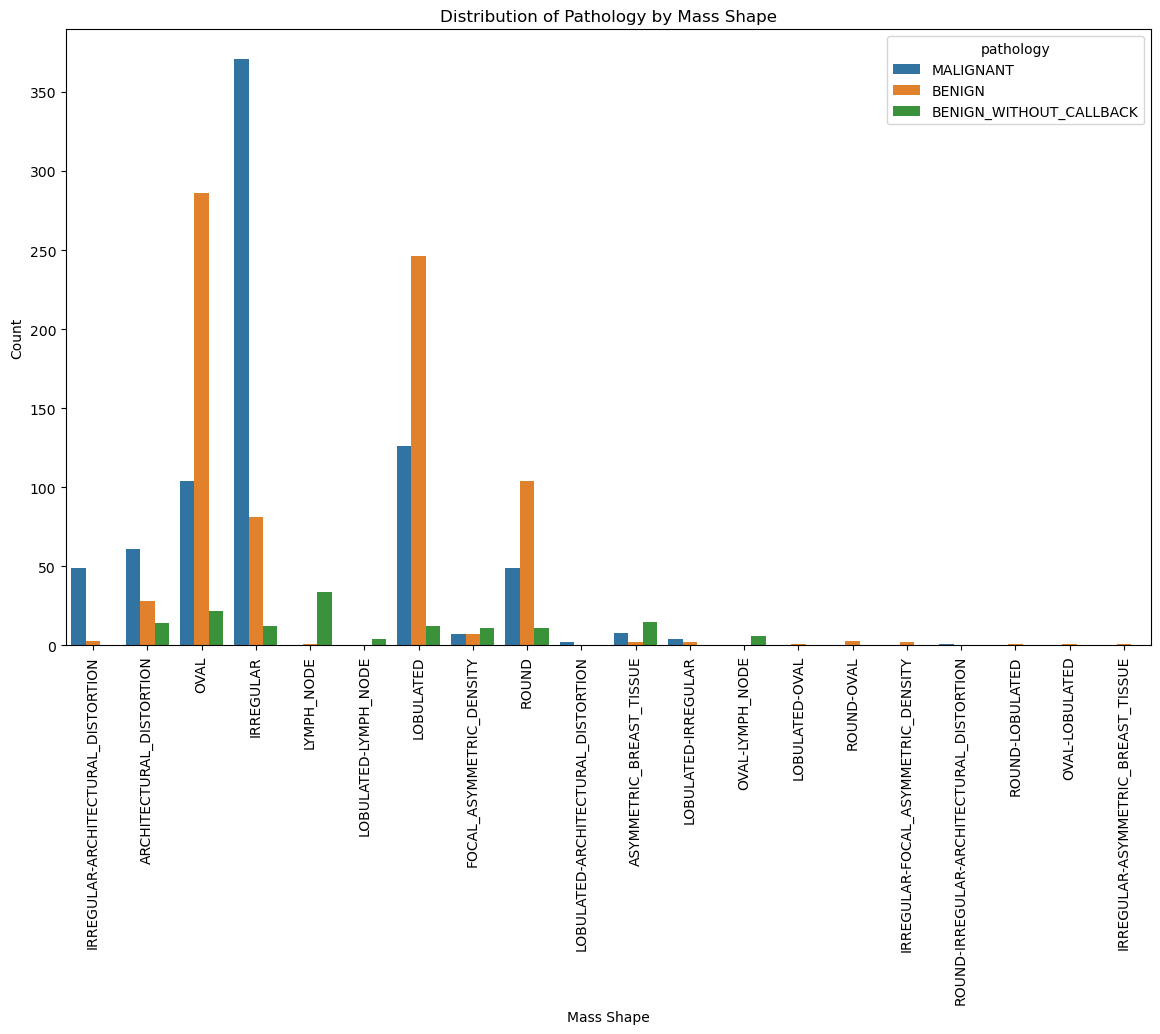

In [49]:
#relationship between mass shape and pathology
plt.figure(figsize=(14, 8))
sns.countplot(data=df_mass_cleaned, x='mass shape', hue='pathology')
plt.title('Distribution of Pathology by Mass Shape')
plt.xlabel('Mass Shape')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [50]:
df_mass_cleaned['breast_density'] = df_mass_cleaned['breast_density'].astype(str)

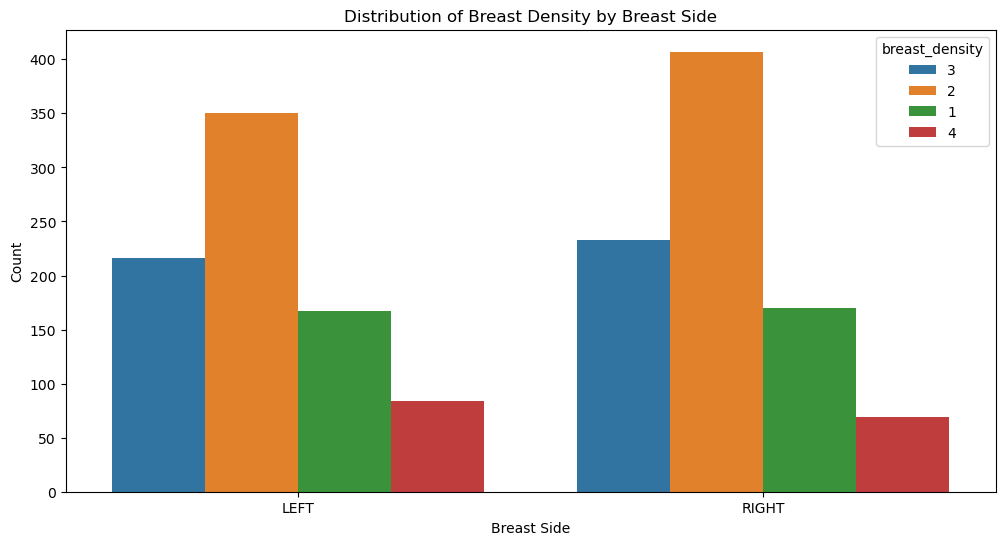

In [51]:
# relationship between left or right breast and breast density
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass_cleaned, x='left or right breast', hue='breast_density')
plt.title('Distribution of Breast Density by Breast Side')
plt.xlabel('Breast Side')
plt.ylabel('Count')
plt.show()

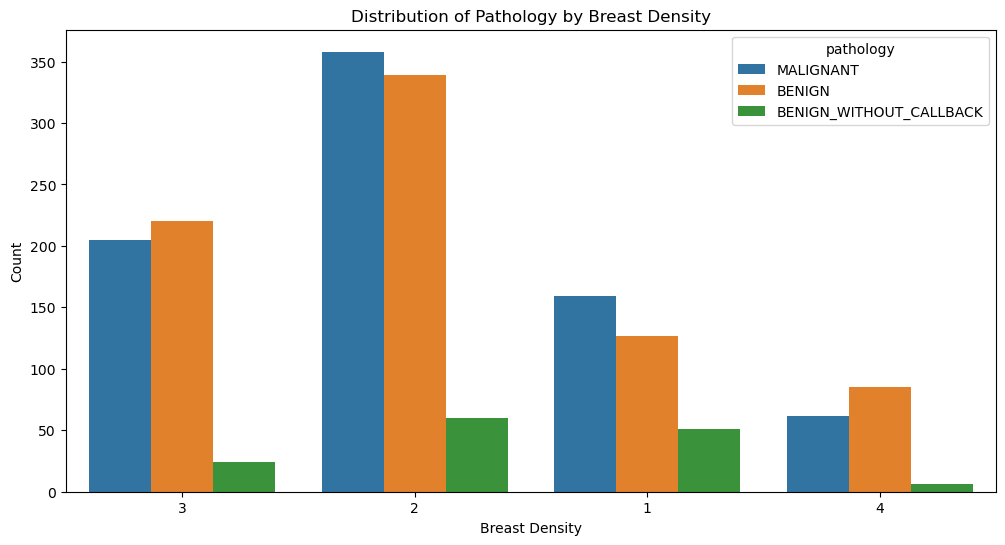

In [52]:
# relationship between breast density and pathology
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass_cleaned, x='breast_density', hue='pathology')
plt.title('Distribution of Pathology by Breast Density')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.show()

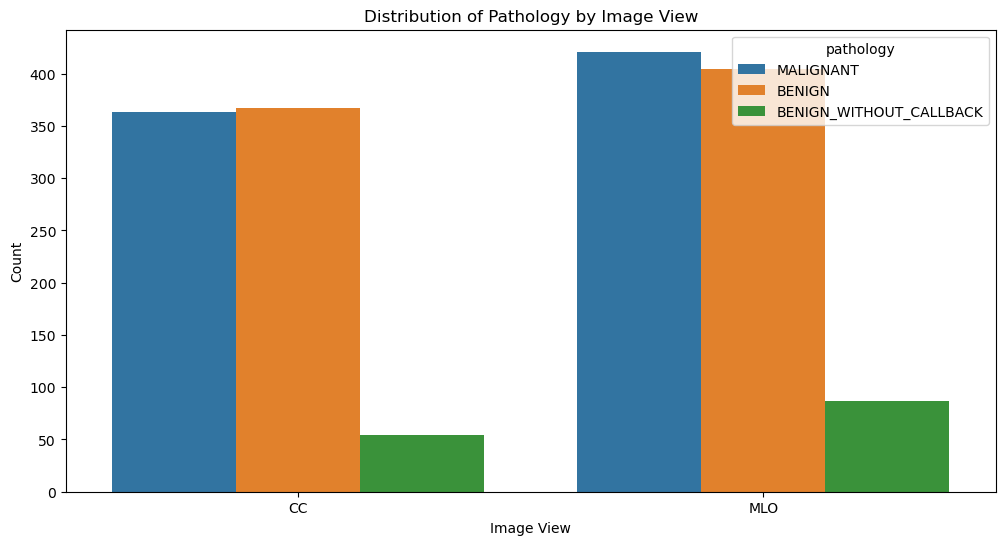

In [53]:
# Image View vs. Pathology
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass_cleaned, x='image view', hue='pathology')
plt.title('Distribution of Pathology by Image View')
plt.xlabel('Image View')
plt.ylabel('Count')
plt.show()

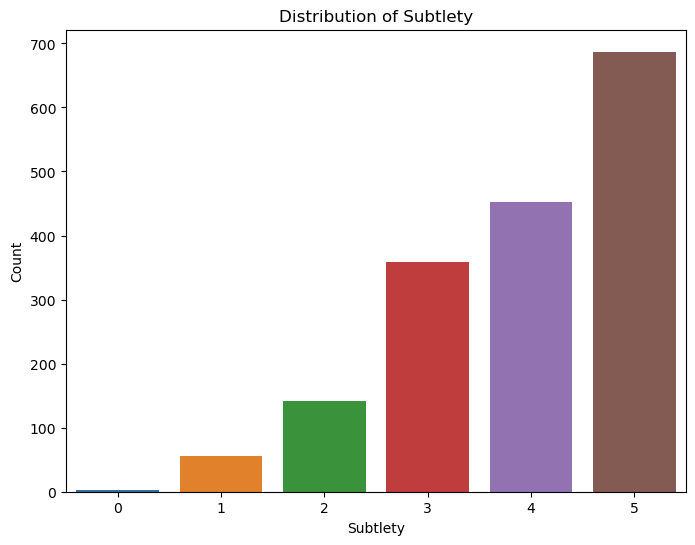

In [54]:
# Subtlety Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_mass_cleaned, x='subtlety')
plt.title('Distribution of Subtlety')
plt.xlabel('Subtlety')
plt.ylabel('Count')
plt.show()

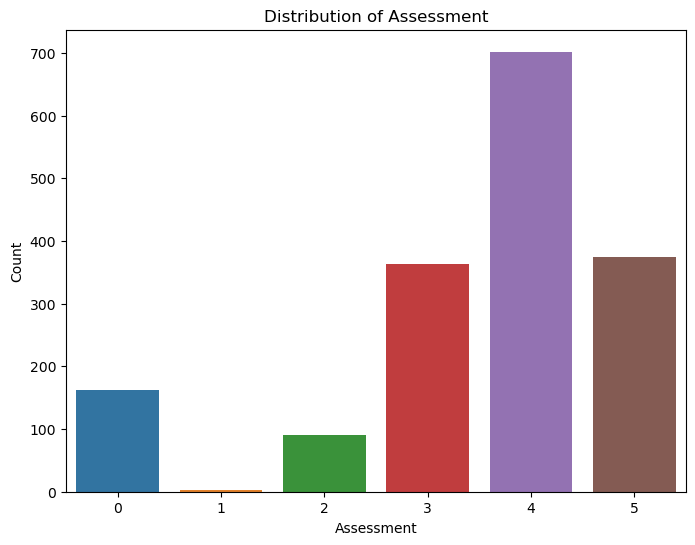

In [55]:
# Assessment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_mass_cleaned, x='assessment')
plt.title('Distribution of Assessment')
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.show()

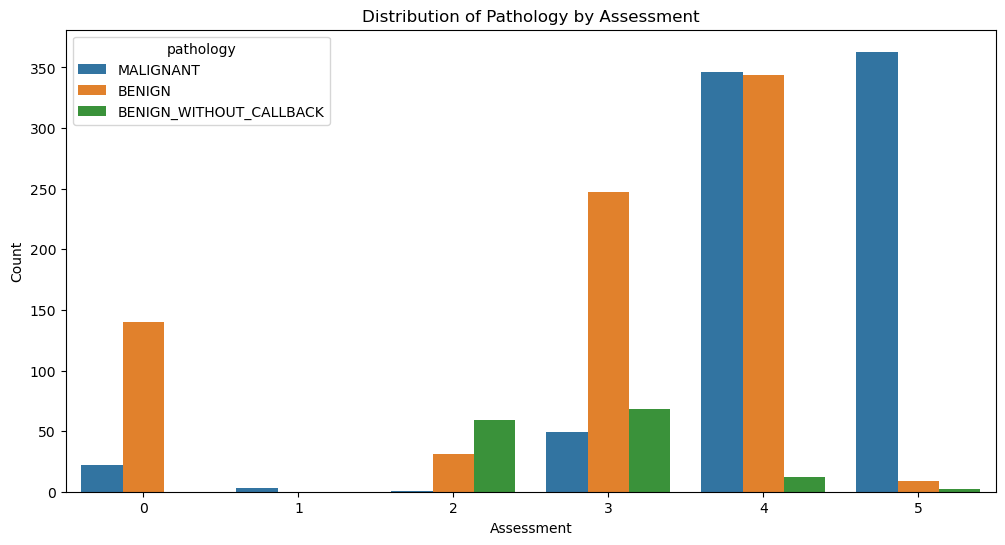

In [56]:
# Assessment vs. Pathology
plt.figure(figsize=(12, 6))
sns.countplot(data=df_mass_cleaned, x='assessment', hue='pathology')
plt.title('Distribution of Pathology by Assessment')
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.show()

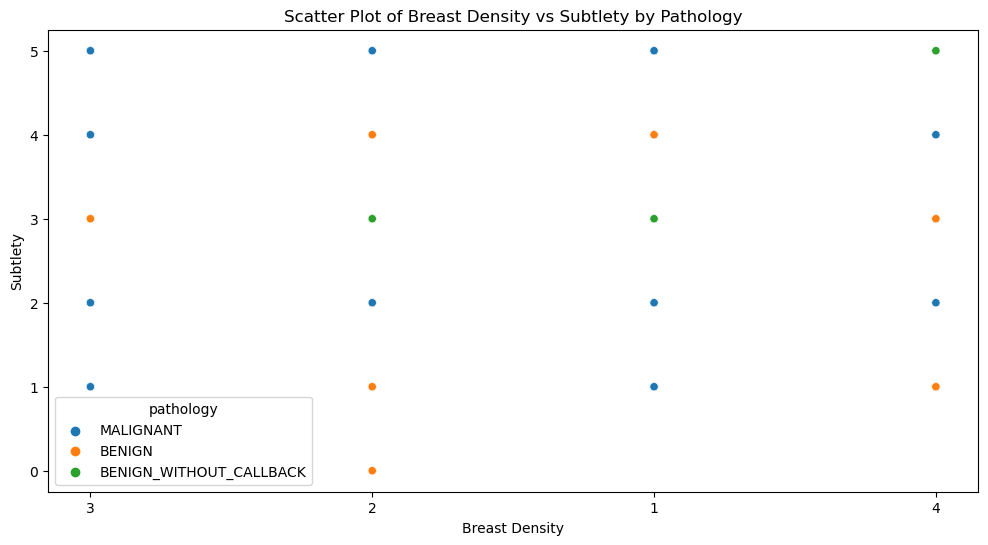

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_mass_cleaned, x='breast_density', y='subtlety', hue='pathology')
plt.title('Scatter Plot of Breast Density vs Subtlety by Pathology')
plt.xlabel('Breast Density')
plt.ylabel('Subtlety')
plt.show()

## calc_case_description

In [59]:
csv_path = 'csv/calc_case_description_train_set.csv'
df_calc = pd.read_csv(csv_path)

# Display the first few rows
df_calc.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [62]:
csv_calc_test_path = 'csv/calc_case_description_test_set.csv'
df_calc = pd.read_csv(csv_calc_test_path)

# Display the first few rows
df_calc.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [63]:
csv_calc_train_path = 'csv/calc_case_description_train_set.csv'
df_calc_train = pd.read_csv(csv_calc_train_path)

# Display the first few rows
df_calc_train.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [65]:
# Concatenate the datasets
df_calc = pd.concat([df_calc, df_calc_train], ignore_index=True)

# Display the first few rows
df_calc.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [66]:
# Display basic information about the calc_case dataset
df_calc.info()

# Check for missing values in the calc_case dataset
df_calc.isnull().sum()

# Display summary statistics for the calc_case dataset
df_calc.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1872 non-null   object
 1   breast density           1872 non-null   int64 
 2   left or right breast     1872 non-null   object
 3   image view               1872 non-null   object
 4   abnormality id           1872 non-null   int64 
 5   abnormality type         1872 non-null   object
 6   calc type                1848 non-null   object
 7   calc distribution        1433 non-null   object
 8   assessment               1872 non-null   int64 
 9   pathology                1872 non-null   object
 10  subtlety                 1872 non-null   int64 
 11  image file path          1872 non-null   object
 12  cropped image file path  1872 non-null   object
 13  ROI mask file path       1872 non-null   object
dtypes: int64(4), object(10)
memory usage: 20

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
count,1872,1872.000000,1872,1872,1872.000000,1872,1848,1433,1872.000000,1872,1872.000000,1872,1872,1872
unique,753,NaN,2,2,NaN,1,47,9,NaN,3,NaN,1511,1872,1872
top,P_01437,NaN,LEFT,MLO,NaN,calcification,PLEOMORPHIC,CLUSTERED,NaN,MALIGNANT,NaN,Calc-Training_P_00112_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
freq,24,NaN,1002,984,NaN,1872,813,935,NaN,673,NaN,7,1,1
mean,NaN,2.669338,NaN,NaN,1.380342,NaN,NaN,NaN,3.292735,NaN,3.395299,NaN,NaN,NaN
std,NaN,0.932322,NaN,NaN,0.853576,NaN,NaN,NaN,1.224108,NaN,1.181426,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,2.000000,NaN,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,3.000000,NaN,NaN,NaN
50%,NaN,3.000000,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000,NaN,3.000000,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN


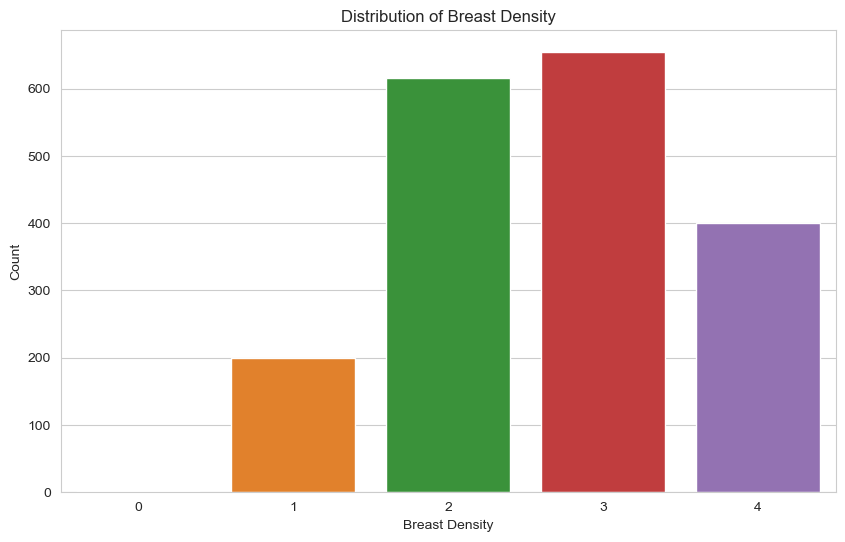

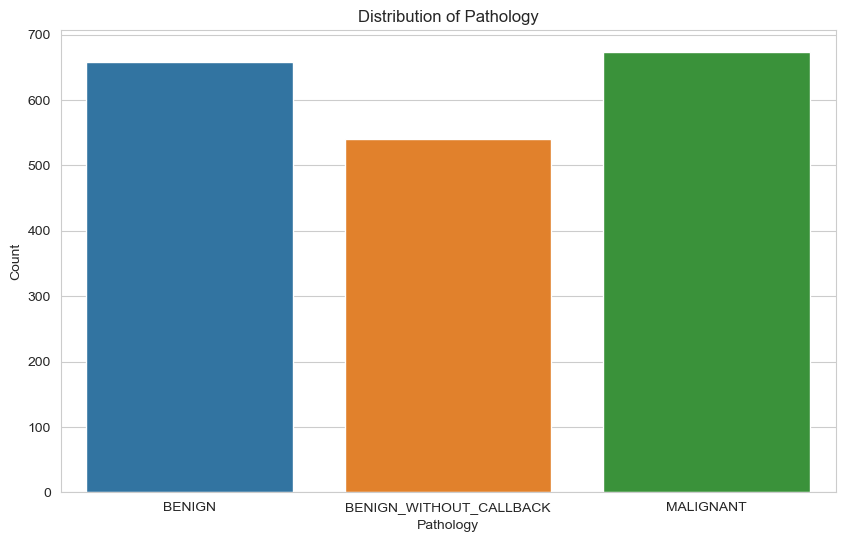

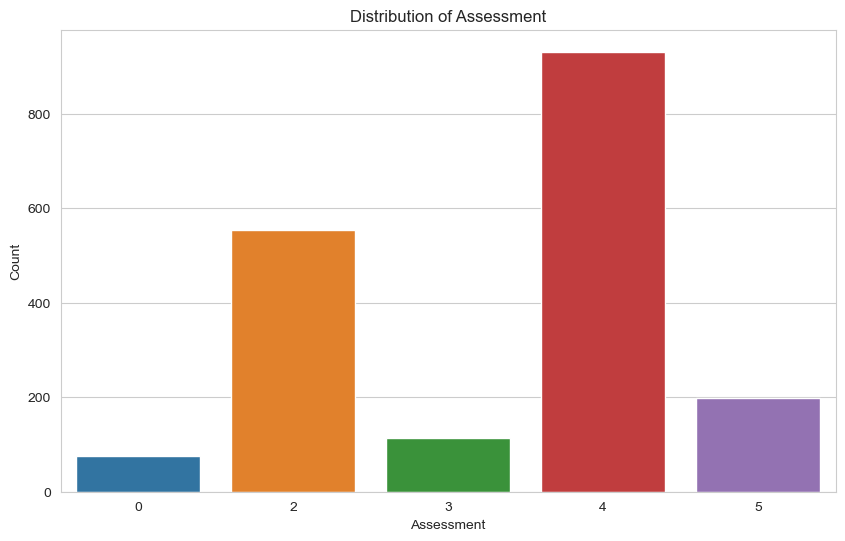

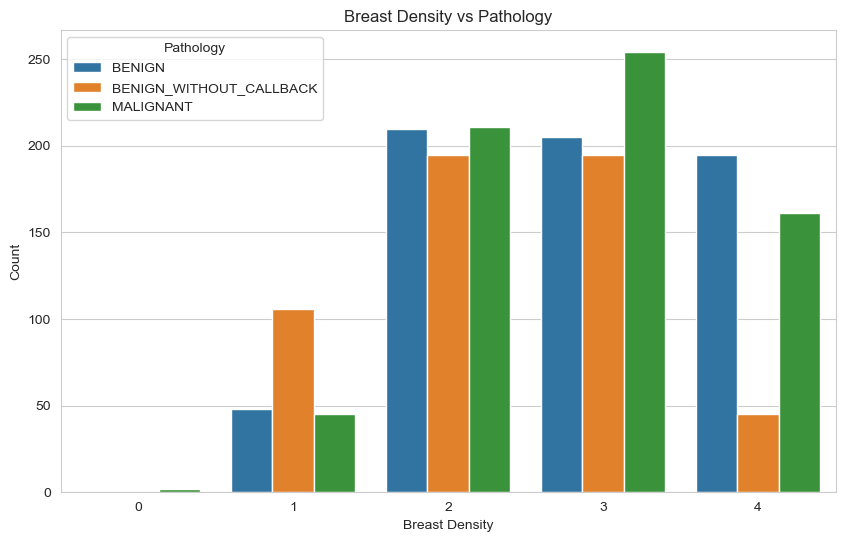

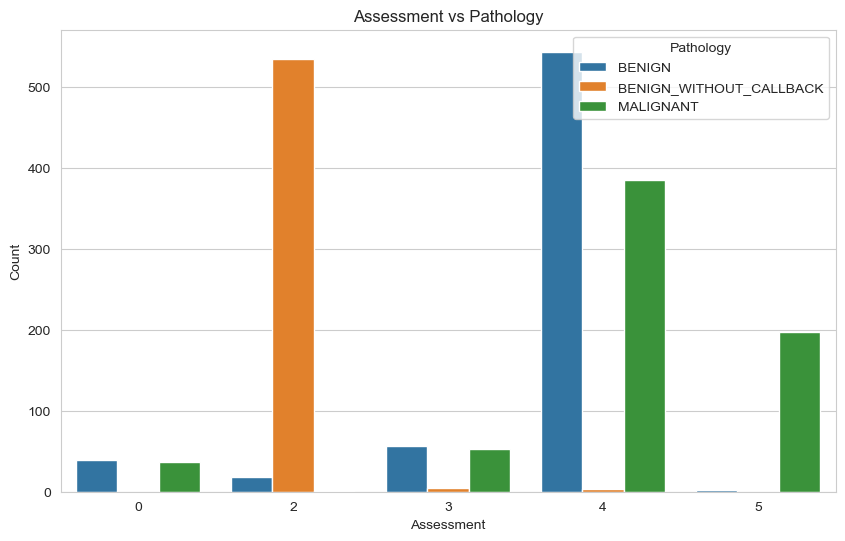

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Distribution of breast density
plt.figure(figsize=(10, 6))
sns.countplot(x='breast density', data=df_calc)
plt.title('Distribution of Breast Density')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.show()

# Distribution of pathology
plt.figure(figsize=(10, 6))
sns.countplot(x='pathology', data=df_calc)
plt.title('Distribution of Pathology')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show()

# Distribution of assessment
plt.figure(figsize=(10, 6))
sns.countplot(x='assessment', data=df_calc)
plt.title('Distribution of Assessment')
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.show()

# Relationship between breast density and pathology
plt.figure(figsize=(10, 6))
sns.countplot(x='breast density', hue='pathology', data=df_calc)
plt.title('Breast Density vs Pathology')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.legend(title='Pathology')
plt.show()

# Relationship between assessment and pathology
plt.figure(figsize=(10, 6))
sns.countplot(x='assessment', hue='pathology', data=df_calc)
plt.title('Assessment vs Pathology')
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.legend(title='Pathology')
plt.show()

## Meta File

In [61]:
csv_meta_path = 'csv/meta.csv'
df_meta = pd.read_csv(csv_meta_path)

# Display the first few rows
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [68]:
df_meta.describe()

,SeriesNumber,Visibility,ImageCount
count,6775.0,6775.0,6775.000000
mean,1.0,1.0,1.511292
std,0.0,0.0,0.499909
min,1.0,1.0,1.000000
25%,1.0,1.0,1.000000
50%,1.0,1.0,2.000000
75%,1.0,1.0,2.000000
max,1.0,1.0,2.000000


In [71]:
df_meta.dtypes

SeriesInstanceUID    object
StudyInstanceUID     object
Modality             object
SeriesDescription    object
BodyPartExamined     object
SeriesNumber          int64
Collection           object
Visibility            int64
ImageCount            int64
dtype: object

In [72]:
df_meta.isnull().sum()

SeriesInstanceUID    0
StudyInstanceUID     0
Modality             0
SeriesDescription    0
BodyPartExamined     0
SeriesNumber         0
Collection           0
Visibility           0
ImageCount           0
dtype: int64

In [76]:
df_meta.duplicated().sum()

0

In [77]:
for col in df_meta:
    print(df_meta[col].unique())

['1.3.6.1.4.1.9590.100.1.2.117041576511324414842508325652101471266'
 '1.3.6.1.4.1.9590.100.1.2.43873839610761788013224723323225482381'
 '1.3.6.1.4.1.9590.100.1.2.76741674113167646338262765132488965294' ...
 '1.3.6.1.4.1.9590.100.1.2.250048723412722873040250881911272043627'
 '1.3.6.1.4.1.9590.100.1.2.323173986211744534717152497940376023803'
 '1.3.6.1.4.1.9590.100.1.2.88091748413596024615343003341621545741']
['1.3.6.1.4.1.9590.100.1.2.229361142710768138411679379233064924540'
 '1.3.6.1.4.1.9590.100.1.2.195593486612988388325770883972107282733'
 '1.3.6.1.4.1.9590.100.1.2.257901172612530623323924356380431605062' ...
 '1.3.6.1.4.1.9590.100.1.2.354475681612412200004953112330168357648'
 '1.3.6.1.4.1.9590.100.1.2.185043095411645186738811042901998911708'
 '1.3.6.1.4.1.9590.100.1.2.347201999812652029915679215363226331267']
['MG']
['ROI mask images' 'cropped images' 'full mammogram images']
['BREAST']
[1]
['CBIS-DDSM']
[1]
[2 1]


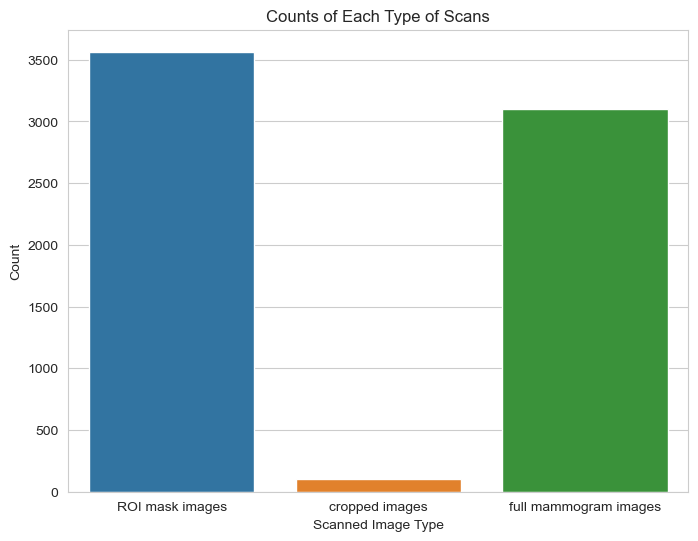

In [78]:
# left or right breast distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_meta, x='SeriesDescription')
plt.title('Counts of Each Type of Scans')
plt.xlabel('Scanned Image Type')
plt.ylabel('Count')
plt.show()